# Luca Corsetti 0001131095

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline

random_state = 777

np.random.seed(random_state)

Consider the file provided with the assignment and perform the tasks described below.
The solution must be produced as a Python Notebook, assuming that the dataset is in the same folder as the notebook. The notebook must include
appropriate comments and must operate as follows:
1. Upload the file Online-Retail-France.xlsx. It is a MS Excel file, you
can read it with the Pandas function read_excel, show the size and a
small portion of its content . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .1pt
2. It is a transactional database where the role of transaction identifier
is played by the column InvoiceNo and the items are in the column
Description. Print the number of unique Description values . . . 1pt
3. Some descriptions represent the same item but have different leading or
trailing spaces, therefore they must be made uniform with the Pandas
function str.strip() Print the number of unique Description values
after this cleaning . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt
4. Some rows may not have an InvoiceNo and must be removed, because
they cannot be used. Check if there are such that rows and in case
remove them. Inspect the effect of this cleaning. . . . . . . . . . . . . . . . . . 1pt
5. Some InvoiceNo start with a C. They are "credit transactions" and
must be removed. Inspect the effect of this cleaning. . . . . . . . . . . . . . 1pt
6. Several transactions include the item POSTAGE, which represents the
mailing expenses. In this analysis we are not interested in it, therefore the rows with POSTAGE will be removed. Inspect the effect of this
cleaning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt
7. After the cleanup, we need to consolidate the items into one transaction per row with products one–hot–encoded. To do so, group by
InvoiceNo and Description computing a sum on Quantity, use the
Pandas unstack function to move the items from rows to columns, reset
the index, fill the missing with zero, store the result in a new dataframe
basket and inspect it. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt
8. There are a lot of zeros in the data but we also need to convert to True
the positive values and to False the non–positive values. Inspect the
result of this transformation and verify the correctness. . . . . . . . . . . 1pt
9. find the maximum value of min_support such that the number of rules
generated from the frequent itemsets with lift not less than 1 is at least
20. Show the value obtained for min_support and show the rules.
Hint: use a loop with an initial value min_support=1 and decrease it in
steps -0.01
Hint: In apriori set the parameter use_colnames=True. . . . . . . . . 2pt
10. Generate the rules with association_rules using metric=lift and
min_threshold=1. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt
11. In order to scatter–plot some information about the rules, it is better
to sort them according to some metrics.
We will sort on descending lift and confidence, then do a scatter plot
of them. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt

### 1. Upload the file Online-Retail-France.xlsx. It is a MS Excel file, you can read it with the Pandas function read_excel, show the size and a small portion of its content

In [2]:
df = pd.read_excel('./Online-Retail-France.xlsx')

print(f"there are {df.shape[0]} rows and {df.shape[1]} columns")

there are 8557 rows and 7 columns


In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-12-01 08:45:00,1.25,12583.0
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,12583.0
9,536370,22629,SPACEBOY LUNCH BOX,24,2010-12-01 08:45:00,1.95,12583.0


### 2. It is a transactional database where the role of transaction identifier is played by the column InvoiceNo and the items are in the column Description. Print the number of unique Description values

to print the unique description values, we will take advantage of numpy's unique fn

In [4]:
descriptions_dirty = np.unique(df.Description, return_counts=True)

print(f"there are {len(descriptions_dirty[0])} 'unique' descriptions, notice that this is before trailing spaces removal")

there are 1565 'unique' descriptions, notice that this is before trailing spaces removal


### 3. Some descriptions represent the same item but have different leading or trailing spaces, therefore they must be made uniform with the Pandas function str.strip() Print the number of unique Description values after this cleaning

In [5]:
X = df.copy()
X.Description = X.Description.str.strip()

descriptions_cleaned = np.unique(X.Description, return_counts=True)

print(f"there are {len(descriptions_cleaned[0])} 'unique' descriptions after cleanining")

there are 1564 'unique' descriptions after cleanining


### 4. Some rows may not have an InvoiceNo and must be removed, because they cannot be used. Check if there are such that rows and in case remove them. Inspect the effect of this cleaning

In [6]:
missing_invoiceNo = X.InvoiceNo.isna()

print(f"there are {missing_invoiceNo.sum()} missing invoice numbers to be purged")

X = X[~missing_invoiceNo]

X.shape

there are 0 missing invoice numbers to be purged


(8557, 7)

### 5. Some InvoiceNo start with a C. They are "credit transactions" and must be removed. Inspect the effect of this cleaning

In [7]:
starting_with_C = X.InvoiceNo.str.startswith('C')

print(f"there are {starting_with_C.sum()} credit transactions to be purged")

X = X[~starting_with_C]

X.shape

there are 149 credit transactions to be purged


(8408, 7)

### 6. Several transactions include the item POSTAGE, which represents the mailing expenses. In this analysis we are not interested in it, therefore the rows with POSTAGE will be removed. Inspect the effect of this cleaning

In [8]:
postage_transactions = X.Description == 'POSTAGE'

print(f"there are {postage_transactions.sum()} POSTAGE transactions to be purged")

X = X[~postage_transactions]

X.shape

there are 300 POSTAGE transactions to be purged


(8108, 7)

### 7. After the cleanup, we need to consolidate the items into one transaction per row with products one–hot–encoded.
To do so, group by InvoiceNo and Description computing a sum on Quantity, use the Pandas unstack function to move the items from rows to columns, reset the index, fill the missing with zero, store the result in a new dataframe basket and inspect it

In [9]:
basket = (X
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo')) # in this way, InvoiceNo is not a column anymore

basket.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.868217,0.310078,0.005168,0.062016,0.509044,0.385013,0.400517,0.062016,0.281654,0.186047,...,0.193798,0.023256,0.010336,0.002584,0.082687,0.279070,0.012920,0.186047,0.031008,0.062016
std,5.109242,2.474110,0.101666,0.861544,5.445138,2.978173,3.454711,1.219989,2.006660,1.484466,...,2.195417,0.340644,0.203331,0.050833,1.626651,2.348994,0.254164,1.922464,0.609994,0.861544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,20.000000,2.000000,12.000000,96.000000,24.000000,48.000000,24.000000,24.000000,12.000000,...,25.000000,6.000000,4.000000,1.000000,32.000000,36.000000,5.000000,24.000000,12.000000,12.000000


### 8. There are a lot of zeros in the data but we also need to convert to True the positive values and to False the non–positive values. Inspect the result of this transformation and verify the correctness.

In [10]:
basket_sets = basket.map(lambda x: x >= 1)

basket_sets.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,375,381,386,385,381,380,380,386,378,381,...,384,385,386,386,386,380,386,383,386,385


### 9. find the maximum value of min_support such that the number of rules generated from the frequent itemsets with lift not less than 1 is at least 20. Show the value obtained for min_support and show the rules.
Hint: use a loop with an initial value min_support=1 and decrease it in steps -0.01\
Hint: In apriori set the parameter use_colnames=True

In [26]:
# requirements
min_lift_threshold = 1
min_rules_threshold = 20

min_support = 1

step = .01 # we will decrease min_support until the optimal solution is found

while min_support > 0:
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
    
    if frequent_itemsets.shape[0] == 0:
        min_support -= step
        continue

    rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric='lift', min_threshold=min_lift_threshold)

    if rules.shape[0] >= min_rules_threshold:
        break
    
    min_support -= step

### 10. Generate the rules with association_rules using metric=lift and min_threshold=1

In [27]:
if min_support > 0:
    print(f"found association rules with min_support={min_support:4.2f}, number of frequent itemsets={frequent_itemsets.shape[0]}, number of rules={rules.shape[0]}")
else:
    print(f"could not generate association rules with apriori with the given requirements")

rules

found association rules with min_support=0.08, number of frequent itemsets=41, number of rules=20


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.098191,0.095607,0.080103,0.815789,8.532717,1.0,0.070716,4.909561,0.978926,0.704545,0.796316,0.826814
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095607,0.098191,0.080103,0.837838,8.532717,1.0,0.070716,5.561154,0.976129,0.704545,0.820181,0.826814
2,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.139535,0.170543,0.090439,0.648148,3.800505,1.0,0.066643,2.357405,0.856371,0.411765,0.575805,0.589226
3,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.170543,0.139535,0.090439,0.530303,3.800505,1.0,0.066643,1.831958,0.888385,0.411765,0.454136,0.589226
4,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.170543,0.173127,0.103359,0.606061,3.500678,1.0,0.073834,2.098986,0.861215,0.430108,0.523580,0.601538
5,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.173127,0.170543,0.103359,0.597015,3.500678,1.0,0.073834,2.058283,0.863906,0.430108,0.514158,0.601538
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.139535,0.173127,0.105943,0.759259,4.385572,1.0,0.081786,3.434705,0.897165,0.512500,0.708854,0.685600
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.173127,0.139535,0.105943,0.611940,4.385572,1.0,0.081786,2.217352,0.933613,0.512500,0.549012,0.685600
8,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.134367,0.139535,0.103359,0.769231,5.512821,1.0,0.084610,3.728682,0.945672,0.606061,0.731809,0.754986
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.139535,0.134367,0.103359,0.740741,5.512821,1.0,0.084610,3.338870,0.951351,0.606061,0.700498,0.754986


### 11. In order to scatter–plot some information about the rules, it is better to sort them according to some metrics. We will sort on descending lift and confidence, then do a scatter plotof them

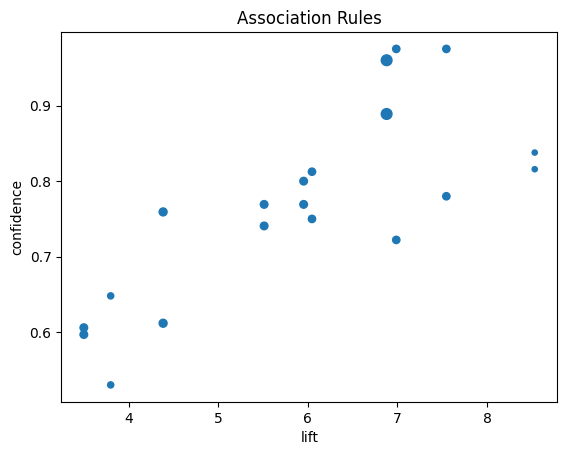

In [37]:
sorted_rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])

plt.scatter(x=sorted_rules['lift'], y=sorted_rules['confidence'], s=3**(sorted_rules['support']*30))
plt.title('Association Rules')
plt.xlabel('lift')
plt.ylabel('confidence')

plt.show()